In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
df = pd.read_csv("Food_Delivery_Times.csv")
print(df.head())
print(df.info())

   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  N

In [ ]:
#--------------Data Cleaning and preprocessing----------------------------
# Dataset shape
print("\tBEFORE")
print("Initial shape:", df.shape)

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

#fix missing values
median_exp = df['Courier_Experience_yrs'].median()
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(median_exp)
df.dropna(inplace=True)
print("\n\tAFTER")
print("Shape after handling missing values:", df.shape)
print("Final missing values:")
print(df.isnull().sum())

	BEFORE
Initial shape: (1000, 9)
Duplicate rows: 0
Missing values per column:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

	AFTER
Shape after handling missing values: (912, 9)
Final missing values:
Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


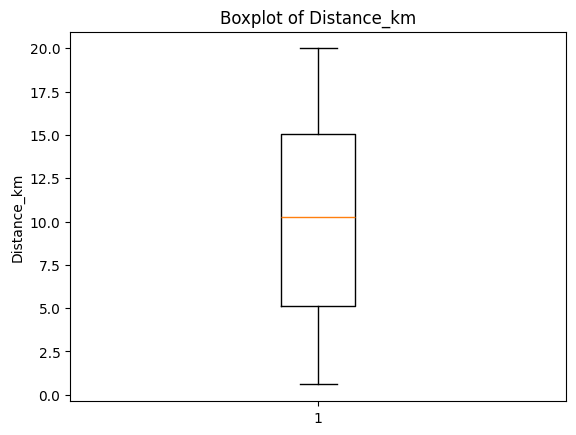

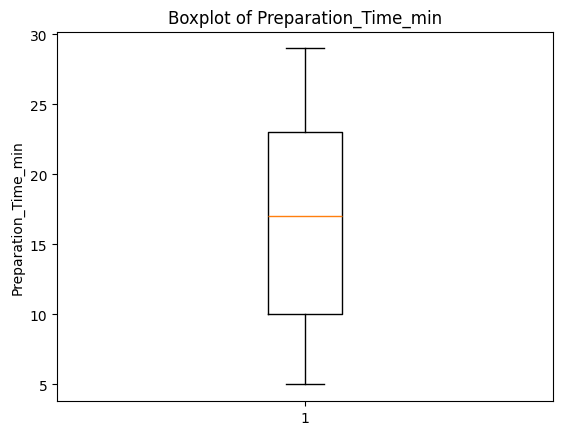

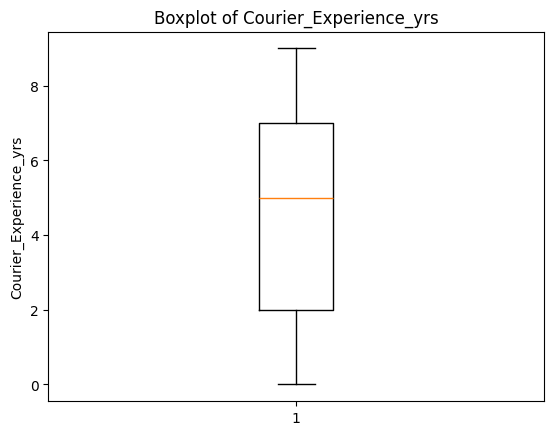

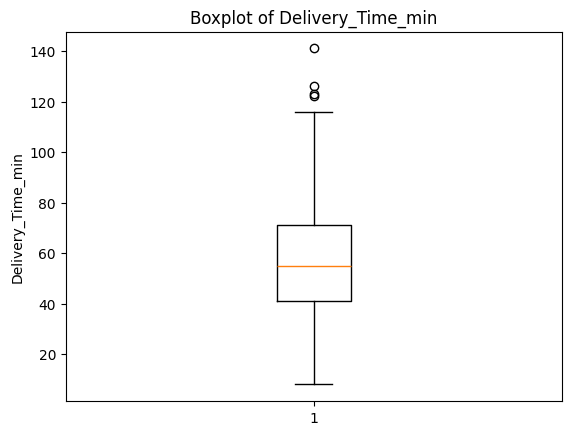


Summary statistics:
          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count   912.000000   912.000000            912.000000              912.000000   
mean    507.573465    10.069320             16.993421                4.651316   
std     288.528012     5.692518              7.264636                2.875980   
min       1.000000     0.590000              5.000000                0.000000   
25%     259.750000     5.130000             10.000000                2.000000   
50%     512.500000    10.285000             17.000000                5.000000   
75%     758.250000    15.042500             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  
count         912.000000  
mean           56.450658  
std            21.581281  
min             8.000000  
25%            41.000000  
50%            55.000000  
75%            71.000000  
max           141.000000  


In [ ]:
#Check outliers
numerical_cols = ['Distance_km', 'Preparation_Time_min','Courier_Experience_yrs', 'Delivery_Time_min']
for col in numerical_cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
print("\nSummary statistics:")
print(df.describe())

Final cleaned dataset shape: (908, 9)


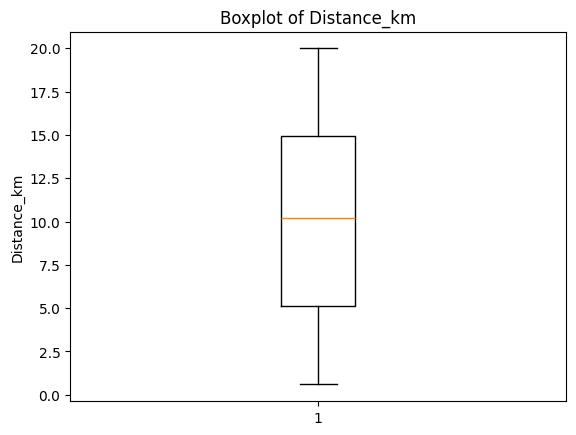

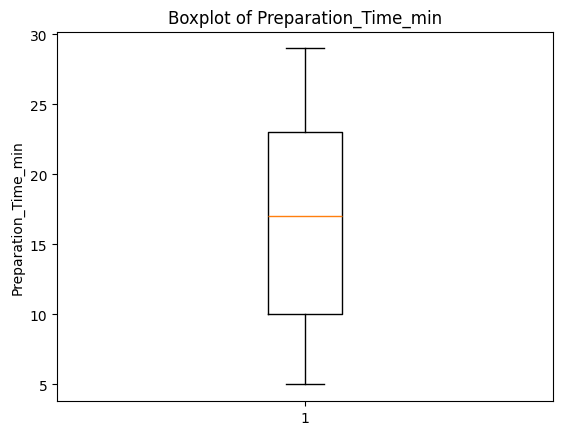

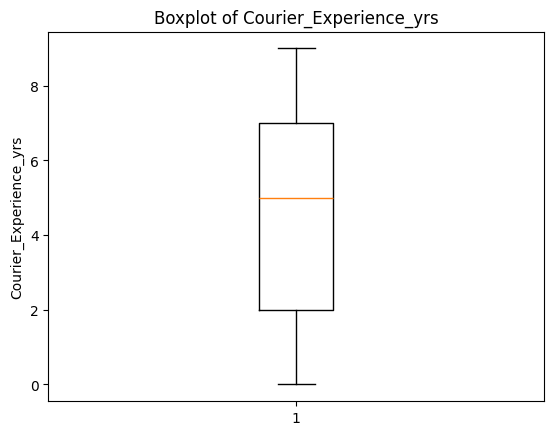

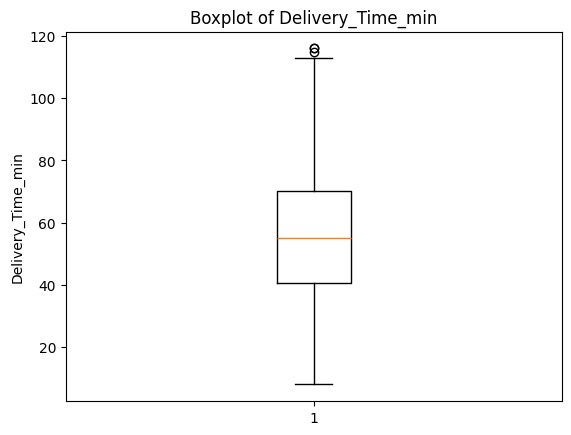


Summary statistics:
          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count   908.000000   908.000000            908.000000              908.000000   
mean    507.378855    10.036960             16.985683                4.650881   
std     288.745428     5.683134              7.270548                2.881016   
min       1.000000     0.590000              5.000000                0.000000   
25%     258.750000     5.105000             10.000000                2.000000   
50%     513.500000    10.220000             17.000000                5.000000   
75%     758.250000    14.965000             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  
count         908.000000  
mean           56.135463  
std            21.091974  
min             8.000000  
25%            40.750000  
50%            55.000000  
75%            70.250000  
max           116.000000  


In [ ]:
#Remove outliers
for col in ['Delivery_Time_min']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Final cleaned dataset shape:", df.shape)

for col in numerical_cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
print("\nSummary statistics:")
print(df.describe())

   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  \
0                    12                     1.0                 43   
1                    20                     2.0                 84   
2                    28                     1.0                 59   
3                     5                     1.0                 37   
4                    16                     5.0                 68   

  Distance_Category  Peak_Hour Experience_Group Delay_Status  
0            Medium          0         Beginner      Delayed  
1 

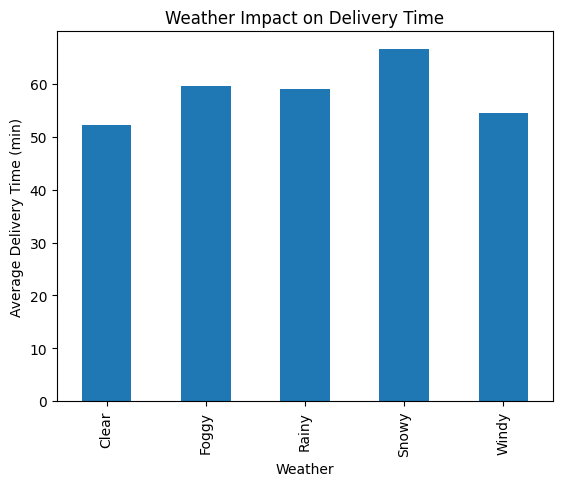

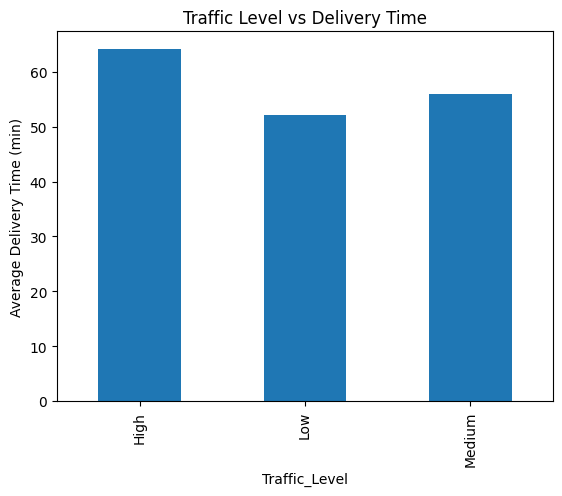

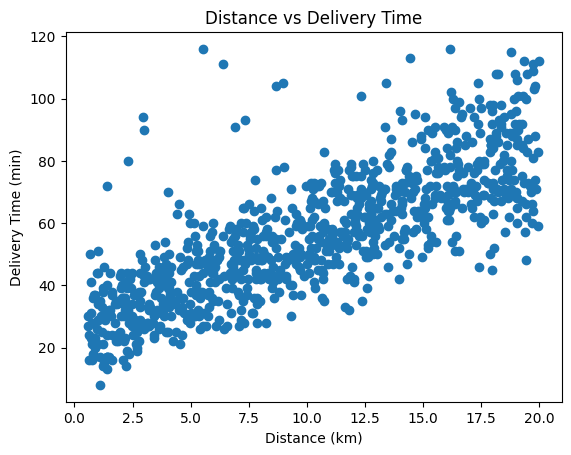

In [ ]:
#------------------------Feature engineering and eda--------------------
# Distance Category
df['Distance_Category'] = pd.cut(
    df['Distance_km'],
    bins=[0, 5, 10, 20, 50],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

# Peak Hour Indicator
df['Peak_Hour'] = df['Time_of_Day'].apply(
    lambda x: 1 if x in ['Evening', 'Night'] else 0
)

# Courier Experience Groups
df['Experience_Group'] = pd.cut(
    df['Courier_Experience_yrs'],
    bins=[0, 2, 5, 10, 50],
    labels=['Beginner', 'Intermediate', 'Experienced', 'Expert']
)

# Delay Status (Target for classification)
df['Delay_Status'] = np.where(
    df['Delivery_Time_min'] >
    df['Preparation_Time_min'] + 15,
    'Delayed', 'On-Time'
)

print(df.head())
# Weather Impact
df.groupby('Weather')['Delivery_Time_min'].mean().plot(kind='bar')
plt.title("Weather Impact on Delivery Time")
plt.ylabel("Average Delivery Time (min)")
plt.show()

# Traffic Impact
df.groupby('Traffic_Level')['Delivery_Time_min'].mean().plot(kind='bar')
plt.title("Traffic Level vs Delivery Time")
plt.ylabel("Average Delivery Time (min)")
plt.show()

# Distance vs Time
plt.scatter(df['Distance_km'], df['Delivery_Time_min'])
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Distance vs Delivery Time")
plt.show()




In [ ]:
#-------------------Label Encoding for categorical columns-------------------
categorical_cols = ['Weather', 'Traffic_Level', 'Vehicle_Type','Distance_Category', 'Experience_Group', 'Delay_Status']

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoder for future use

print(df.head())


   Order_ID  Distance_km  Weather  Traffic_Level Time_of_Day  Vehicle_Type  \
0       522         7.93        4              1   Afternoon             2   
1       738        16.42        0              2     Evening             0   
2       741         9.52        1              1       Night             2   
3       661         7.44        2              2   Afternoon             2   
4       412        19.03        0              1     Morning             0   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  \
0                    12                     1.0                 43   
1                    20                     2.0                 84   
2                    28                     1.0                 59   
3                     5                     1.0                 37   
4                    16                     5.0                 68   

   Distance_Category  Peak_Hour  Experience_Group  Delay_Status  
0                  1          0             

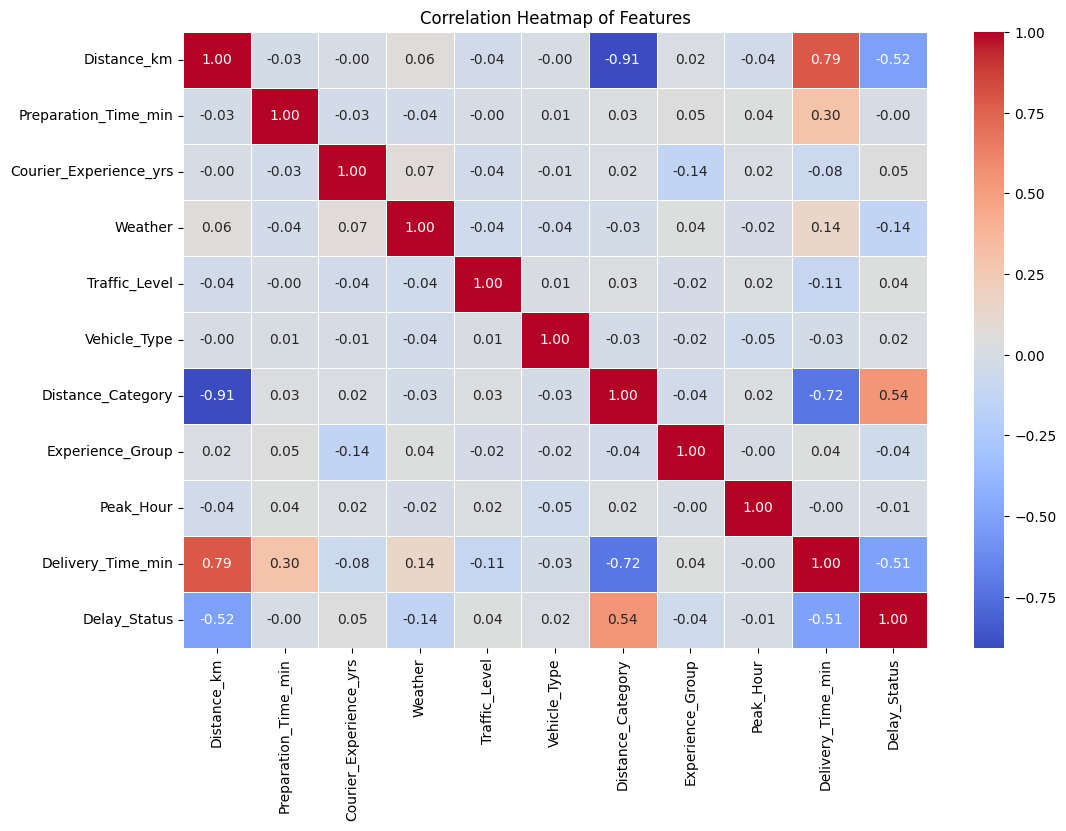

In [ ]:
import seaborn as sns

# ---------------- Correlation Heatmap ----------------
plt.figure(figsize=(12, 8))

# Select only numeric columns
corr = df[['Distance_km',
           'Preparation_Time_min',
           'Courier_Experience_yrs',
           'Weather',
           'Traffic_Level',
           'Vehicle_Type',
           'Distance_Category',
           'Experience_Group',
           'Peak_Hour',
           'Delivery_Time_min',
           'Delay_Status']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
# Features (excluding target columns)
X = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',
        'Weather', 'Traffic_Level', 'Vehicle_Type', 'Distance_Category',
        'Experience_Group', 'Peak_Hour']]

# Targets
y_reg = df['Delivery_Time_min']  # Regression
y_clf = df['Delay_Status']       # Classification

# Split dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

#Standardize Features
# Regression scaler
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Classification scaler
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

In [ ]:
#------------Linear Regression-------------------------
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)
# Predictions
y_pred_reg = lr_model.predict(X_test_reg_scaled)
# Evaluation
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Linear Regression MAE:", mae)

#----------------KNN for Delivery Time--------------------
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg_scaled, y_train_reg)

y_pred_knn_reg = knn_reg.predict(X_test_reg_scaled)
mae_knn_reg = mean_absolute_error(y_test_reg, y_pred_knn_reg)
print("\nKNN Regressor MAE:", mae_knn_reg)

#------------------MLP Regressor---------------------------------------
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train_reg_scaled, y_train_reg)
# Predictions
y_pred_mlp = mlp_model.predict(X_test_reg_scaled)
# Evaluation
mae_mlp = mean_absolute_error(y_test_reg, y_pred_mlp)
print("\nMLP Regressor MAE:", mae_mlp)

#-----------Logistic Regression-------------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf_scaled, y_train_clf)
# Predictions
y_pred_clf = log_model.predict(X_test_clf_scaled)
# Evaluation
accuracy = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("\n\nLogistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

#--------------------KNN for Delay Status------------------------
# Initialize KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)  # k=5
knn_clf.fit(X_train_clf_scaled, y_train_clf)
# Predict
y_pred_knn = knn_clf.predict(X_test_clf_scaled)
# Evaluate
accuracy_knn = accuracy_score(y_test_clf, y_pred_knn)
cm_knn = confusion_matrix(y_test_clf, y_pred_knn)
print("\nKNN Classifier Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", cm_knn)

#---------------------MLP Classifier---------------------------------------
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,25), activation='relu', max_iter=500, random_state=42)
mlp_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_clf = mlp_clf.predict(X_test_clf_scaled)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
cm_clf = confusion_matrix(y_test_clf, y_pred_clf)
print("\nMLP Classifier Accuracy:", accuracy_clf)
print("Confusion Matrix:\n", cm_clf)


# Regression models comparison (MAE)
reg_results = pd.DataFrame({
    "Model": ["Linear Regression", "KNN Regressor", "MLP Regressor"],
    "MAE": [mae, mae_knn_reg, mae_mlp]
})

print("\nRegression Model Comparison:")
print(reg_results)

# Classification models comparison (Accuracy)
clf_results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN Classifier", "MLP Classifier"],
    "Accuracy": [accuracy, accuracy_knn, accuracy_clf]
})

print("\nClassification Model Comparison:")
print(clf_results)


Linear Regression MAE: 6.990025044953636

KNN Regressor MAE: 8.989010989010989


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Regressor MAE: 6.480837339654254


Logistic Regression Accuracy: 0.9285714285714286
Confusion Matrix:
 [[157   7]
 [  6  12]]

KNN Classifier Accuracy: 0.9065934065934066
Confusion Matrix:
 [[158   6]
 [ 11   7]]

MLP Classifier Accuracy: 0.9560439560439561
Confusion Matrix:
 [[161   3]
 [  5  13]]

Regression Model Comparison:
               Model       MAE
0  Linear Regression  6.990025
1      KNN Regressor  8.989011
2      MLP Regressor  6.480837

Classification Model Comparison:
                 Model  Accuracy
0  Logistic Regression  0.928571
1       KNN Classifier  0.906593
2       MLP Classifier  0.956044


In [ ]:
# Scale full dataset
X_scaled_full_reg = scaler_reg.transform(X)      # regression scaler
X_scaled_full_clf = scaler_clf.transform(X)      # classification scaler

# Predict Delivery Times
df['Predicted_Delivery_Time_LR'] = lr_model.predict(X_scaled_full_reg)
df['Predicted_Delivery_Time_KNN'] = knn_reg.predict(X_scaled_full_reg)
df['Predicted_Delivery_Time_MLP'] = mlp_model.predict(X_scaled_full_reg)

# Keep actual delivery time
df['Actual_Delivery_Time'] = df['Delivery_Time_min']

#  Predict Delay Status
df['Delay_Status_LogReg'] = log_model.predict(X_scaled_full_clf)
df['Delay_Status_KNN'] = knn_clf.predict(X_scaled_full_clf)
df['Delay_Status_MLP'] = mlp_clf.predict(X_scaled_full_clf)

# Convert numeric predictions back to original labels if using LabelEncoder
df['Delay_Status_LogReg'] = le_dict['Delay_Status'].inverse_transform(df['Delay_Status_LogReg'])
df['Delay_Status_KNN'] = le_dict['Delay_Status'].inverse_transform(df['Delay_Status_KNN'])
df['Delay_Status_MLP'] = le_dict['Delay_Status'].inverse_transform(df['Delay_Status_MLP'])

# Keep actual delay status
df['Actual_Delay_Status'] = le_dict['Delay_Status'].inverse_transform(df['Delay_Status'])

#  Save full CSV
df.to_csv("Full_Food_Delivery_Predictions.csv", index=False)
print("Full CSV saved as 'Full_Food_Delivery_Predictions.csv'")


Full CSV saved as 'Full_Food_Delivery_Predictions.csv'


In [ ]:
#-------------------Feature Importance----------------------
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print("\nFeature Importance (Linear Regression):")
print(importance.sort_values(by='Coefficient', key=abs, ascending=False))
print("\nFeature Importance (Logistic Regression):")
importance_log = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]  # For binary classification
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(importance_log)




Feature Importance (Linear Regression):
                  Feature  Coefficient
0             Distance_km    16.132920
1    Preparation_Time_min     6.463796
3                 Weather     2.177297
4           Traffic_Level    -1.537883
2  Courier_Experience_yrs    -1.482392
5            Vehicle_Type    -0.566780
8               Peak_Hour     0.465798
6       Distance_Category    -0.422997
7        Experience_Group    -0.313930

Feature Importance (Logistic Regression):
                  Feature  Coefficient
0             Distance_km    -4.204252
6       Distance_Category     0.918894
3                 Weather    -0.622103
2  Courier_Experience_yrs     0.391731
4           Traffic_Level     0.271787
7        Experience_Group    -0.193274
5            Vehicle_Type     0.178901
1    Preparation_Time_min    -0.073341
8               Peak_Hour    -0.026493
